## 뉴스 기사 분류: 다중 분류 문제

### 로이터 데이터셋

**로이터 데이터셋 로드하기**

In [1]:
from tensorflow.keras.datasets import reuters
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

2023-07-28 13:33:33.215708: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-28 13:33:33.253658: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**로이터 데이터셋을 텍스트로 디코딩하기**

In [6]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [8]:
train_labels[10]

3

### 데이터 준비

**데이터 인코딩하기**

In [9]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**레이블 인코딩하기**

In [10]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [11]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### 모델 구성

**모델 정의하기**

In [12]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

2023-07-28 13:33:36.477237: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 8035 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:1a:00.0, compute capability: 8.6


**모델 컴파일하기**

In [13]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### 훈련 검증

**검증 세트 준비하기**

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**모델 훈련하기**

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2023-07-28 13:33:38.270510: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-07-28 13:33:38.272528: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f7661129f70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-28 13:33:38.272549: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2023-07-28 13:33:38.275734: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-28 13:33:39.475343: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8902
2023-07-28 13:33:39.516865: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-07-28 13:33:39.59487

16/16 [==============================] - 3s 23ms/step - loss: 2.8255 - accuracy: 0.4970 - val_loss: 1.9066 - val_accuracy: 0.6110
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 1.5859 - accuracy: 0.6765 - val_loss: 1.4028 - val_accuracy: 0.6920
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 1.2040 - accuracy: 0.7398 - val_loss: 1.2126 - val_accuracy: 0.7480
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.9817 - accuracy: 0.7944 - val_loss: 1.1121 - val_accuracy: 0.7780
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.8108 - accuracy: 0.8315 - val_loss: 1.0369 - val_accuracy: 0.7820
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 0.6819 - accuracy: 0.8562 - val_loss: 0.9744 - val_accuracy: 0.7830
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 0.5728 - accuracy: 0.8766 - val_loss: 0.9254 - val_accuracy: 0.8090
Epoch 8/20
16/16 [======

**훈련과 검증 손실 그리기**

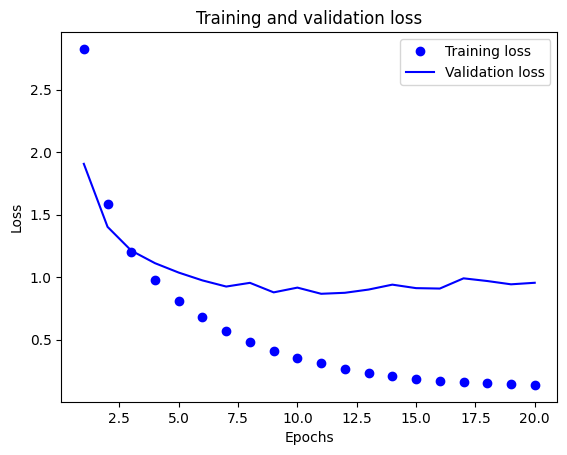

In [16]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**훈련과 검증 정확도 그리기**

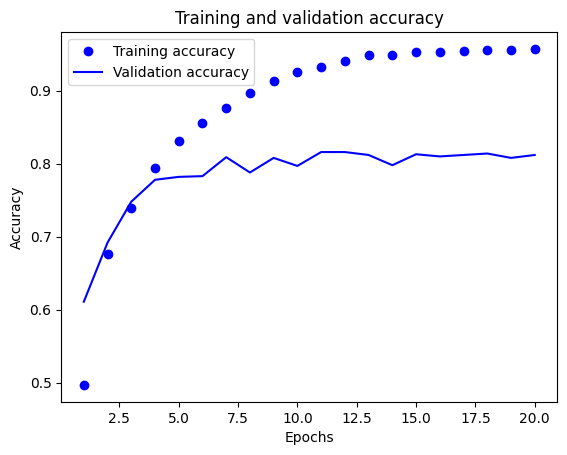

In [17]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**모델을 처음부터 다시 훈련하기**

In [18]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 8ms/step - loss: 2.5803 - accuracy: 0.5040
Epoch 2/9
18/18 [==============================] - 0s 9ms/step - loss: 1.4551 - accuracy: 0.6909
Epoch 3/9
18/18 [==============================] - 0s 9ms/step - loss: 1.1202 - accuracy: 0.7594
Epoch 4/9
18/18 [==============================] - 0s 8ms/step - loss: 0.9192 - accuracy: 0.8068
Epoch 5/9
18/18 [==============================] - 0s 9ms/step - loss: 0.7655 - accuracy: 0.8369
Epoch 6/9
18/18 [==============================] - 0s 7ms/step - loss: 0.6384 - accuracy: 0.8621
Epoch 7/9
18/18 [==============================] - 0s 7ms/step - loss: 0.5338 - accuracy: 0.8830
Epoch 8/9
18/18 [==============================] - 0s 9ms/step - loss: 0.4489 - accuracy: 0.9016
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.8899 - accuracy: 0.7965


In [19]:
results

[0.8898583650588989, 0.7965271472930908]

In [20]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1892252894033838

### 새로운 데이터로 예측하기

In [21]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [22]:
predictions[0].shape

(46,)

In [23]:
np.sum(predictions[0])

1.0000002

In [24]:
np.argmax(predictions[0])

3

### 레이블과 손실을 다루는 다른 방법

In [25]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [26]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### 충분히 큰 중간 층을 두어야 하는 이유

**정보 병목이 있는 모델**

In [27]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 8ms/step - loss: 2.8441 - accuracy: 0.2675 - val_loss: 2.2458 - val_accuracy: 0.3750
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 1.9993 - accuracy: 0.4318 - val_loss: 1.7968 - val_accuracy: 0.5600
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 1.5875 - accuracy: 0.5920 - val_loss: 1.5586 - val_accuracy: 0.6230
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.3724 - accuracy: 0.6393 - val_loss: 1.4562 - val_accuracy: 0.6350
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 1.2577 - accuracy: 0.6540 - val_loss: 1.4237 - val_accuracy: 0.6400
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 1.1721 - accuracy: 0.6570 - val_loss: 1.3793 - val_accuracy: 0.6550
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 1.0979 - accuracy: 0.6923 - val_loss: 1.3607 - val_accuracy: 0.6750
Epoch 8/20
63/63 [==